<font color="#483D8B">
<h1  align="center"> Improve model performance with ensemble learning </h1>
<div align="center">
<font size=3><b>
<br>INET4061 Lab 7 
<br>Mahsa Ayoughi
<br>November 1, 2019
<br></font></b></div>

# Overview

We will create the following classification models to classify wine using the scikit-learn dataset and to compare their performance:

* RandomForestClassifier
* KNeighborsClassifier
* SVC
* LogisticRegression

We will Create the following ensemble models for each of the classification models and Compare their performance of the ensemble models:

* Bagging
* Boosting
* Stacking  using Grid Search cross-validation


In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

Code Source: https://medium.com/@saugata.paul1010/ensemble-learning-bagging-boosting-stacking-and-cascading-classifiers-in-machine-learning-9c66cb271674
 
 Most code and text in this Jupyter notebook have been taken from the source above.

# Data

In [2]:
file = "/Users/mahsaayoughi/Downloads/wine.data" 
df = pd.read_csv(file, delimiter=',')

In [3]:
print(df.shape)
peek = df.head(5)
print(peek)

(177, 14)
   1  14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29  5.64  1.04  3.92  \
0  1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
1  1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
2  1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
3  1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   
4  1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97  6.75  1.05  2.85   

   1065  
0  1050  
1  1185  
2  1480  
3   735  
4  1450  


In [4]:
df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
              'Alcalinity of ash', 'Magnesium', 'Total phenols',
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
              'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

display(df.head())

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


# Exploratory data analysis 

In [5]:
X = df.drop('Class label', 1)
y = df['Class label']
#X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])
print('Class labels:', np.unique(y))

#https://nthu-datalab.github.io/ml/labs/03_Decision-Trees_Random-Forest/03_Decision-Tree_Random-Forest.html

#Training data points: 123
#Testing data points: 54
Class labels: [1 2 3]


In [6]:
df.describe()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Models

We will first create classification models and compare their accuracy.

## RandomForestClassifier

a random forest can be considered as an ensemble of decision trees. The idea behind ensemble learning is to combine weak learners to build a more robust model, a strong learner, that has a better generalization performance. The random forest algorithm can be summarized in four simple steps:
    
    1.Randomly draw M
    2.bootstrap samples from the training set with replacement;
    Grow a decision tree from the bootstrap samples. At each node:
        A.Randomly select K features without replacement;
        B. Split the node by finding the best cut among the selected features that maximizes the information gain;
    3.Repeat the steps 1 to 2 T times to get T trees;
    4.Aggregate the predictions made by different trees via the majority vote.

In [7]:
# criterion : impurity function
# n_estimators :  number of decision trees
# random_state : seed used by the random number generator
# n_jobs : number of cores for parallelism
forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print('Accuracy (forest): %.4f' % accuracy_score(y_test, y_pred))

#https://nthu-datalab.github.io/ml/labs/03_Decision-Trees_Random-Forest/03_Decision-Tree_Random-Forest.html

Accuracy (forest): 0.9815


## KNeighborsClassifier

The training phase of K-nearest neighbor classification is much faster compared to other classification algorithms.
KNN can be useful in case of nonlinear data. It can be used with the regression problem. Output value for the object is computed by the average of k closest neighbors value.

The testing phase of K-nearest neighbor classification is slower and costlier in terms of time and memory. It requires large memory for storing the entire training dataset for prediction. KNN requires scaling of data because KNN uses the Euclidean distance between two data points to find nearest neighbors.

In [8]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [9]:
print('Accuracy (KNeighbors): %.4f' % accuracy_score(y_test, y_pred))
#Accuracy can be computed by comparing actual test set values and predicted values.
#https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

Accuracy (KNeighbors): 0.7222


## SVC

Cross-validation is a process for reliably estimating the performance of a method for building a model by training and evaluating your model multiple times using the same method.

In [10]:
#https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
#Create a svm Classifier
SVC = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
SVC.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = SVC.predict(X_test)

In [11]:
# Model Accuracy: how often is the classifier correct?
print('Accuracy (SVC): %.4f' % accuracy_score(y_test, y_pred))

Accuracy (SVC): 0.9630


SVM Classifiers offer good accuracy and performs fast prediction to some other algorithms. They also use less memory because they use a subset of training points in the decision phase.

SVM is not suitable for large datasets because of its high training time and it also takes more time in train. It works poorly with overlapping classes and is also sensitive to the type of kernel used.

## LogisticRegression

In [12]:

logreg = LogisticRegression(C=20000, penalty='l2', random_state=0) 

#Train the model using the training sets
logreg.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = logreg.predict(X_test)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [13]:
# Model Accuracy: how often is the classifier correct?
print('Accuracy (LogisticRegression): %.4f' % accuracy_score(y_test, y_pred))

Accuracy (LogisticRegression): 0.9259


### Model Performance (classification models)

Accuracy (forest): 0.9815
Accuracy (KNeighbors): 0.7222
Accuracy (SVC): 0.9630
Accuracy (LogisticRegression): 0.9259
    
Based on the models, we can evaluate the test error and compare it to the accuracy of the prediction. It seems that our models are pretty accurate with our prediction, while the test error is small in comparison.

Accuracy comparison: Random Forest > SVC > Logistic Regression > KNeighbors
We can see that the Random Forest has the highest Accuracy compared to ther models and the KNeighbors classifior has the least Accuracy.

## Bagging (Random Forest,  kNN,  SVC, Logistic Regression)

Bagging is a bootstrap ensemble method that creates individuals for its ensemble by training each classifier on a random redistribution of the training set.
In the code below we will initialize the four base learners, fit them to our trainning set and compare it’s accuracy to the bagging versions of each of the classifiers.

In [14]:
classifier_array = [forest, knn, SVC, logreg]
labels = [clf.__class__.__name__ for clf in classifier_array]
normal_accuracy = []
normal_std = []
bagging_accuracy = []
bagging_std = []


In [15]:
for clf in classifier_array:
    cv_scores = cross_val_score(clf, X, y, cv=3, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, max_samples=0.4, max_features=3, random_state=0)
    bagging_scores = cross_val_score(bagging_clf, X, y, cv=3, n_jobs=-1)
    
    normal_accuracy.append(np.round(cv_scores.mean(),4))
    normal_std.append(np.round(cv_scores.std(),4))
    
    bagging_accuracy.append(np.round(bagging_scores.mean(),4))
    bagging_std.append(np.round(bagging_scores.std(),4))
    
    print("Accuracy: %0.4f (+/- %0.4f) [Normal %s]" % (cv_scores.mean(), cv_scores.std(), clf.__class__.__name__))
    print("Accuracy: %0.4f (+/- %0.4f) [Bagging %s]\n" % (bagging_scores.mean(), bagging_scores.std(), clf.__class__.__name__))

Accuracy: 0.9437 (+/- 0.0348) [Normal RandomForestClassifier]
Accuracy: 0.9379 (+/- 0.0287) [Bagging RandomForestClassifier]

Accuracy: 0.6787 (+/- 0.0567) [Normal KNeighborsClassifier]
Accuracy: 0.9606 (+/- 0.0206) [Bagging KNeighborsClassifier]

Accuracy: 0.9275 (+/- 0.0697) [Normal SVC]
Accuracy: 0.9099 (+/- 0.0198) [Bagging SVC]

Accuracy: 0.9101 (+/- 0.0335) [Normal LogisticRegression]
Accuracy: 0.9321 (+/- 0.0367) [Bagging LogisticRegression]



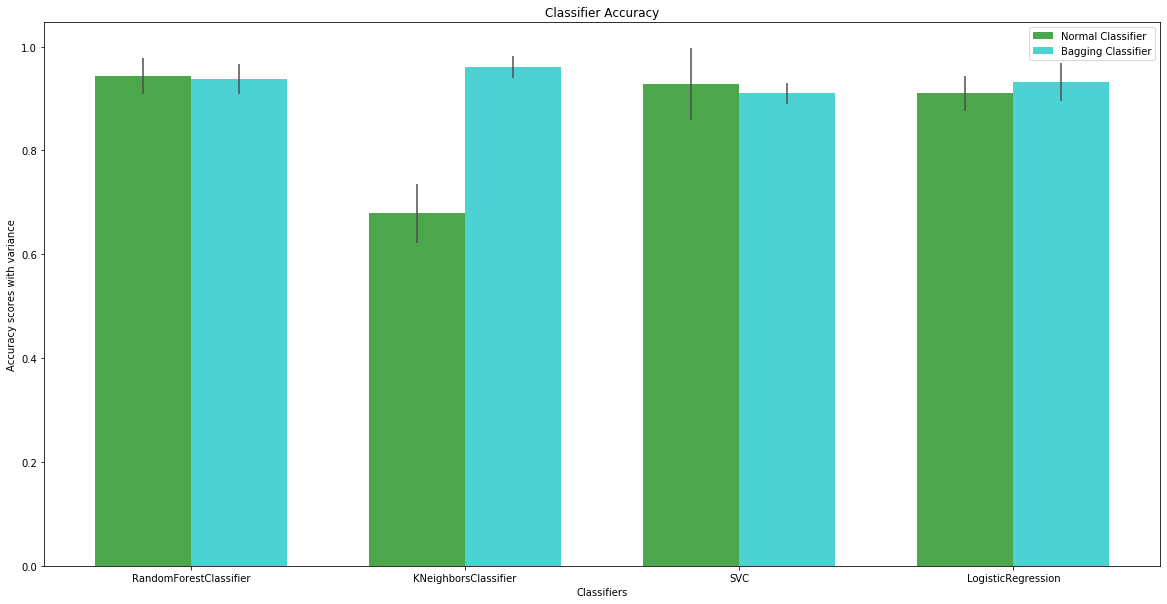

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
n_groups = 4
index = np.arange(n_groups)
bar_width = 0.35
opacity = .7
error_config = {'ecolor': '0.3'}
normal_clf = ax.bar(index, normal_accuracy, bar_width, alpha=opacity, color='g', yerr=normal_std, error_kw=error_config, label='Normal Classifier')
bagging_clf = ax.bar(index + bar_width, bagging_accuracy, bar_width, alpha=opacity, color='c', yerr=bagging_std, error_kw=error_config, label='Bagging Classifier')
ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy scores with variance')
ax.set_title('Classifier Accuracy')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels((labels))
ax.legend()
#fig.tight_layout()
plt.show()

The vertical black line present at the top of each bar indicates the variance in the model. As we can see, the variance mostly reduces when we use the bagging version of any classifier. However, for some models, variance increases slightly more than the normal version of the classifier. This is mostly because of lack of training data points.


Accuracy: 0.9437 (+/- 0.0348) [Normal RandomForestClassifier]

Accuracy: 0.9379 (+/- 0.0287) [Bagging RandomForestClassifier]

Compared to all the other models the only model that has a lower Bagging accuracy is the Radnom Forest Classifier.  problem with decision trees is that they are greedy. They choose which variable to split on using a greedy algorithm that minimizes error. As such, even with Bagging, the decision trees can have a lot of structural similarities and in turn have high correlation in their predictions.

Source: https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/

Accuracy: 0.6787 (+/- 0.0567) [Normal KNeighborsClassifier]

Accuracy: 0.9606 (+/- 0.0206) [Bagging KNeighborsClassifier]

Accuracy: 0.9275 (+/- 0.0697) [Normal SVC]

Accuracy: 0.9099 (+/- 0.0198) [Bagging SVC]

Accuracy: 0.9101 (+/- 0.0335) [Normal LogisticRegression]

Accuracy: 0.9321 (+/- 0.0367) [Bagging LogisticRegression]

In all other models the accuracy has improved compared to the baseline accueacy. We can see that the most improved is the KNeighborsClassifier classifier. (this is a significant decrese in the accuracy so I am worried the data might not be balanced and it's overfitting) 

## Boosting

Boosting reduces generalization error by taking a high-bias & low-variance model and reducing the bias by a significant level.

In [17]:
ada_boost = AdaBoostClassifier(n_estimators=5)
grad_boost = GradientBoostingClassifier(n_estimators=10)
xgb_boost = XGBClassifier(max_depth=5, learning_rate=0.001)
ensemble_clf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')
boosting_labels = ['Ada Boost', 'Gradient Boost', 'XG Boost', 'Ensemble']
for clf, label in zip([ada_boost, grad_boost, xgb_boost, ensemble_clf], boosting_labels):
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: {0:.3f}, Variance: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Accuracy: 0.842, Variance: (+/-) 0.034 [Ada Boost]
Accuracy: 0.847, Variance: (+/-) 0.064 [Gradient Boost]
Accuracy: 0.870, Variance: (+/-) 0.069 [XG Boost]
Accuracy: 0.881, Variance: (+/-) 0.060 [Ensemble]


Accuracy comparison: Ensemble > XG Boost > Gradient Boost > Ada Boost

Accuracy of the Ensembled model is higher than rest of the boosting models.

### Computing Feature Importance
In addition to classification, a random forest can be used to calculate the feature importance. Using a random forest, we can measure feature importance as the averaged information gain (impurity decrease) computed from all decision trees in the forest.

In [18]:
importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))



 1) Flavanoids                     0.190030
 2) Proline                        0.149304
 3) Color intensity                0.141731
 4) OD280/OD315 of diluted wines   0.137056
 5) Alcohol                        0.106215
 6) Hue                            0.072115
 7) Total phenols                  0.044148
 8) Malic acid                     0.038744
 9) Magnesium                      0.037172
10) Alcalinity of ash              0.029950
11) Proanthocyanins                0.023881
12) Ash                            0.016971
13) Nonflavanoid phenols           0.012682


I have trained and fitted the model to two of the most important features,"Flavanoids" and "Proline".

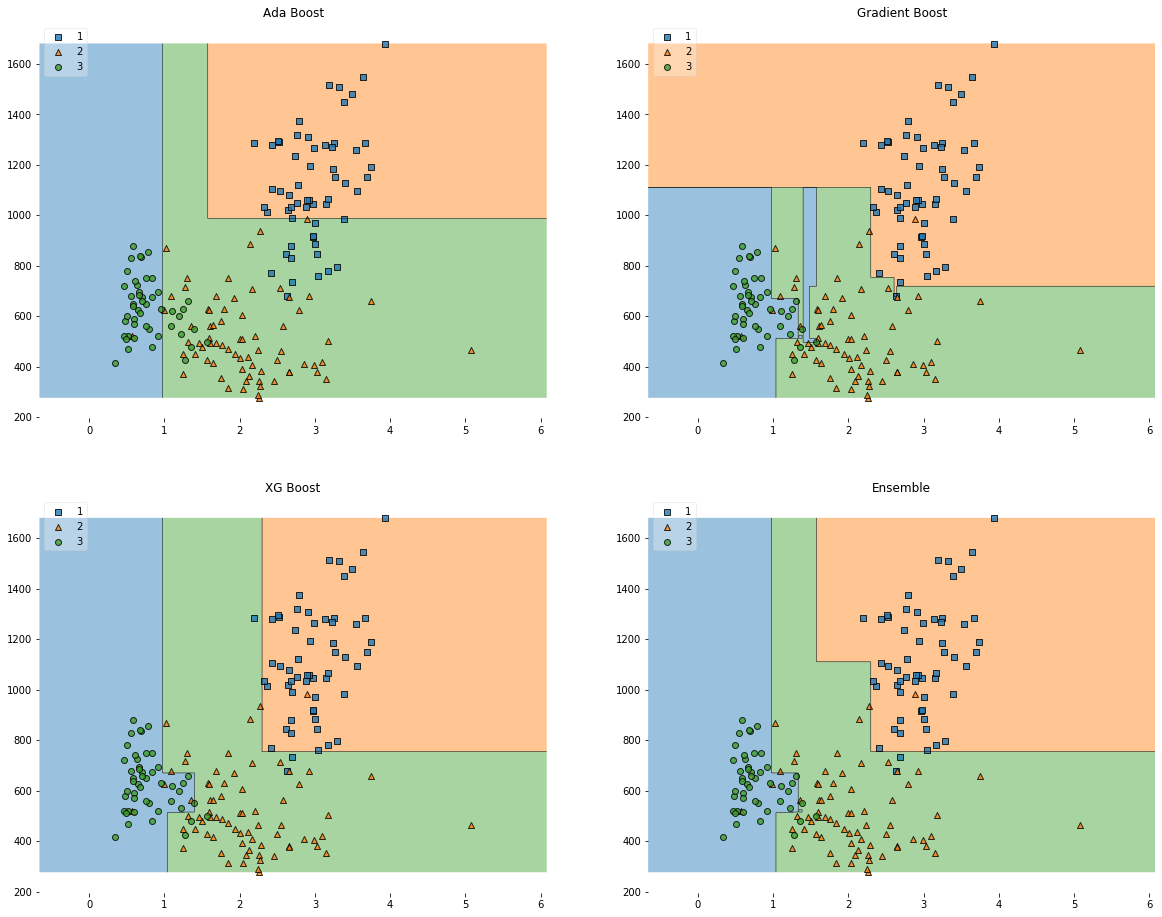

In [19]:
#Decision Regions for all the boosting algorithms.
X = np.array(df[['Flavanoids','Proline']])
y = np.array(y)
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,16))
for clf, label, grd in zip([ada_boost, grad_boost, xgb_boost, ensemble_clf], boosting_labels, itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label)
plt.show()

Decision Regions for the ensemble model is the most improved as we can see.
Ensemble learning helps improve machine learning results by combining several models. This approach allows the production of better predictive performance compared to a single model

## Stacking Classifiers (Random Forest,  kNN,  SVC, Logistic Regression input into a Logistic Regression meta-classifier)

Stacking is an ensemble learning technique which is used to combine the predictions of diverse classification models into one single model also known as the meta-classifier.

All the individual models are trained separately on the complete training data set and fine-tuned to achieve a greater accuracy. The bias and variance trade-off is taken care off for each model. The final model, also known as the meta-classifier is fed either the class labels predicted by the base models or the predicted probabilities for each class label. The meta-classifier is then trained based on the outputs given by the base models. In stacking, a new model is trained based on the predictions made by the previous models.

In [20]:
sclf = StackingClassifier(classifiers=[forest, knn, SVC], meta_classifier=logreg)
classifier_array = [forest, knn, SVC, logreg]
labels = [clf.__class__.__name__ for clf in classifier_array]
acc_list = []
var_list = []
for clf, label in zip(classifier_array, labels):
    cv_scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %0.5f (+/- %0.4f) [Stacking %s]\n" % (cv_scores.mean(), cv_scores.std(), label))
    acc_list.append(np.round(cv_scores.mean(),4))
    var_list.append(np.round(cv_scores.std(),4))
    #print("Accuracy: {} (+/- {}) [{}]".format(np.round(scores.mean(),4), np.round(scores.std(),4), label))

Accuracy: 0.89896 (+/- 0.0488) [Stacking RandomForestClassifier]

Accuracy: 0.68931 (+/- 0.0441) [Stacking KNeighborsClassifier]

Accuracy: 0.88766 (+/- 0.0551) [Stacking SVC]

Accuracy: 0.89896 (+/- 0.0598) [Stacking LogisticRegression]



//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be ch

Accuracy of RandomForestClassifier and LogisticRegression are equal and the highest compared to KNeighbors and SVC Classifiers. the error is a liitle higher for LogisticRegression compared to RandomForestClassifier.

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


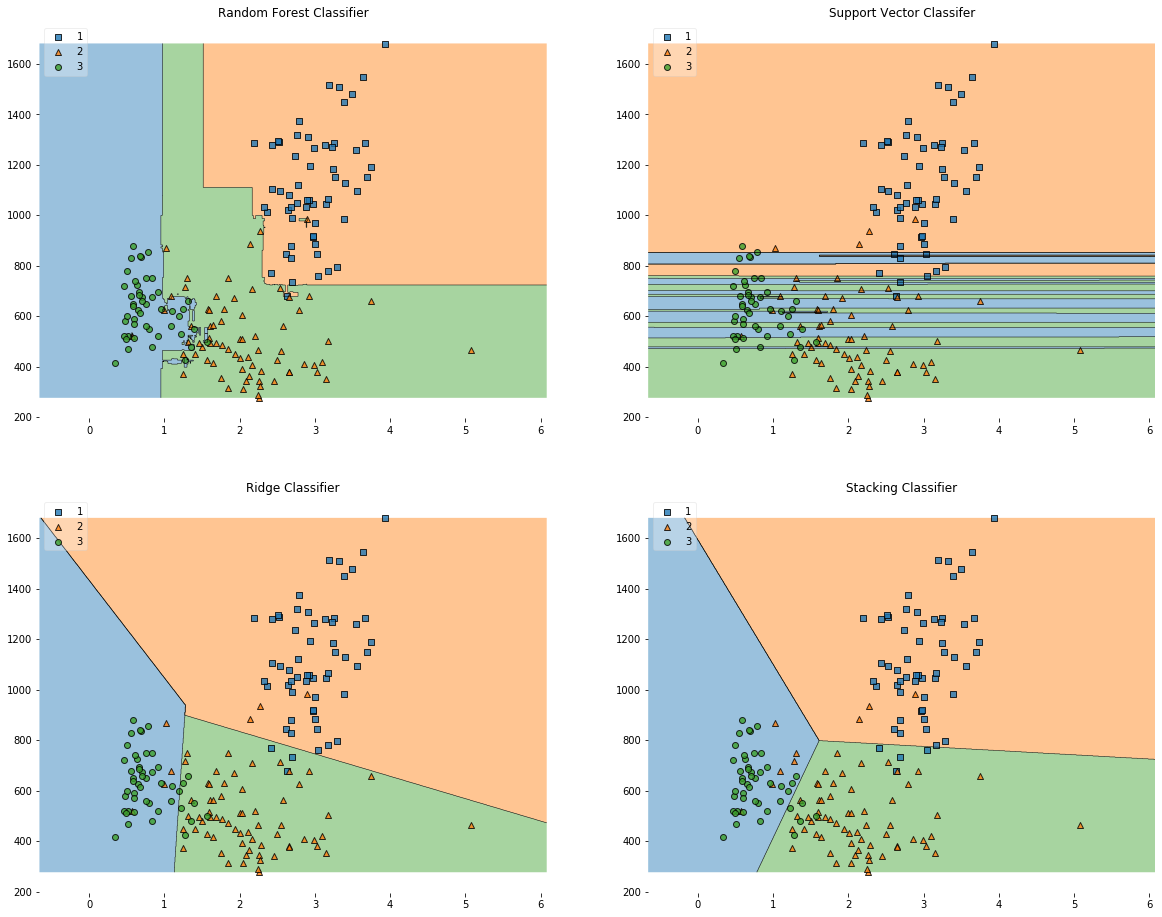

In [21]:
#Decision Regions for 4 algorithms.
X = np.array(df[['Flavanoids','Proline']])
y = np.array(y)
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(20,16))
for clf, label, grd in zip([forest, knn, SVC, logreg], ["Random Forest Classifier", "Support Vector Classifer", "Ridge Classifier", "Stacking Classifier"], itertools.product([0, 1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(label)
plt.show()

Decision Regions for all three base classifiers vs the meta-classifier.

## Model Performance (Ensemble models)

Accuracy: 0.9437 (+/- 0.0348) [Normal RandomForestClassifier]

Accuracy: 0.9379 (+/- 0.0287) [Bagging RandomForestClassifier]

Accuracy: 0.89896 (+/- 0.0488) [Stacking RandomForestClassifier]


Accuracy: 0.6787 (+/- 0.0567) [Normal KNeighborsClassifier]

Accuracy: 0.9606 (+/- 0.0206) [Bagging KNeighborsClassifier]

Accuracy: 0.68931 (+/- 0.0441) [Stacking KNeighborsClassifier]



Accuracy: 0.9275 (+/- 0.0697) [Normal SVC]

Accuracy: 0.9099 (+/- 0.0198) [Bagging SVC]

Accuracy: 0.88766 (+/- 0.0551) [Stacking SVC]


Accuracy: 0.9101 (+/- 0.0335) [Normal LogisticRegression]

Accuracy: 0.9321 (+/- 0.0367) [Bagging LogisticRegression]

Accuracy: 0.89896 (+/- 0.0598) [Stacking LogisticRegression]


Accuracy: 0.842, Variance: (+/-) 0.034 [Ada Boost]

Accuracy: 0.853, Variance: (+/-) 0.066 [Gradient Boost]

Accuracy: 0.870, Variance: (+/-) 0.069 [XG Boost]

Accuracy: 0.876, Variance: (+/-) 0.056 [Ensemble]

We can see that Bagging has the highest Accuracy compared to Boosting and stacking. The Ensemble model also has the highest Accuracy compared to all the other boosting methods.


## Conclusion

The main point of this jupyter notebook is to show that ensemble modelling can produce better predictions, and the various methods used to evaluate the models created.
All three ensemble models are so-called "meta-algorithms": approaches to combine several machine learning techniques into one predictive model in order to decrease the variance (bagging), bias (boosting) or improving the predictive force (stacking alias ensemble).

The idea behind bagging is that when you OVERFIT with a nonparametric regression method, you tend to go to the high variance, no bias part of the bias/variance tradeoff. This is because an overfitting model is very flexible.

Gradient boosting works with UNDERFIT nonparametric regressions, that are too simple and thus aren't flexible enough to describe the real relationship in the data (i.e. biased) but, because they are under fitting, have low variance.

Stacking is a similar to boosting. you also apply several models to your original data. The difference here is, however, that you don't have just an empirical formula for your weight function.

Source: https://stats.stackexchange.com/questions/bagging-boosting-and-stacking-in-machine-learning